# 11. Dropout - метод борьбы с переобучением нейронной сети

In [5]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout

%matplotlib inline

#### Рекомендация 1
- если наблюдается расхождение в точности выходных данных значений между обучающей и проверочной выборками, то процесс обучения следует остановить и уменьшить число нейронов.

#### Рекомендация 2
- если наблюдается переобучение и сокращение числа нейронов недопустимо (по тем или иным причинам), то следует попробовать метод Dropout.

вероятность р. надо начинать с р=0,5, затем уменьшать.

#### Реализация Dropout в Keras

In [3]:
#загрузка обучающей и тестовой выборок

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#стандартизация входных данных

x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [4]:
limit = 5000
x_train_data = x_train[:limit]
y_train_data = y_train_cat[:limit]

x_valid = x_train[limit : limit*2]
y_valid = y_train_cat[limit : limit*2]

In [6]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(300, activation='relu'),
    #Dropout(0.8),
    Dense(10, activation='softmax')
])

/home/alexandr/anaconda3/envs/tens/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#запуск процесса обучения без Dropout

his = model.fit(x_train_data, y_train_data, batch_size=32, epochs=50,
          validation_data=(x_valid, y_valid))

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7323 - loss: 0.9396 - val_accuracy: 0.8960 - val_loss: 0.3462
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9321 - loss: 0.2429 - val_accuracy: 0.9040 - val_loss: 0.3153
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9473 - loss: 0.1827 - val_accuracy: 0.9240 - val_loss: 0.2509
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9756 - loss: 0.1160 - val_accuracy: 0.9240 - val_loss: 0.2497
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9777 - loss: 0.0882 - val_accuracy: 0.9276 - val_loss: 0.2288
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9884 - loss: 0.0582 - val_accuracy: 0.9294 - val_loss: 0.2271
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9922 - loss: 0.0439 - val_accuracy: 0.9294 - val_loss: 0.2327
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9939 - loss: 0.0386 - val_accuracy: 0.

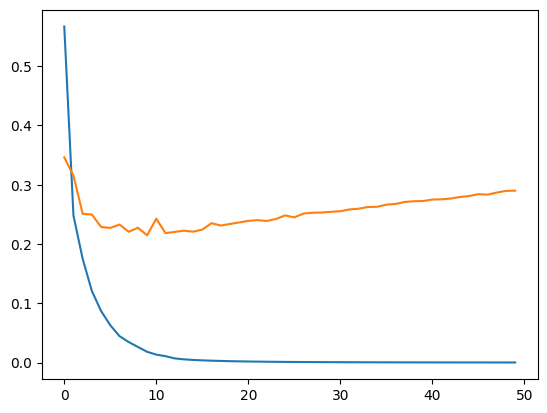

In [9]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

In [10]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(300, activation='relu'),
    Dropout(0.8),
    Dense(10, activation='softmax')
])

/home/alexandr/anaconda3/envs/tens/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
#запуск процесса обучения c Dropout

his = model.fit(x_train_data, y_train_data, batch_size=32, epochs=50,
          validation_data=(x_valid, y_valid))

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4756 - loss: 1.5753 - val_accuracy: 0.8676 - val_loss: 0.4857
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 0.6339 - val_accuracy: 0.8998 - val_loss: 0.3671
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.5032 - val_accuracy: 0.9086 - val_loss: 0.3179
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8841 - loss: 0.4106 - val_accuracy: 0.9094 - val_loss: 0.3032
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8873 - loss: 0.3771 - val_accuracy: 0.9118 - val_loss: 0.2848
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8924 - loss: 0.3446 - val_accuracy: 0.9194 - val_loss: 0.2665
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9004 - loss: 0.3374 - val_accuracy: 0.9266 - val_loss: 0.2463
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9145 - loss: 0.2929 - val_accuracy: 0.

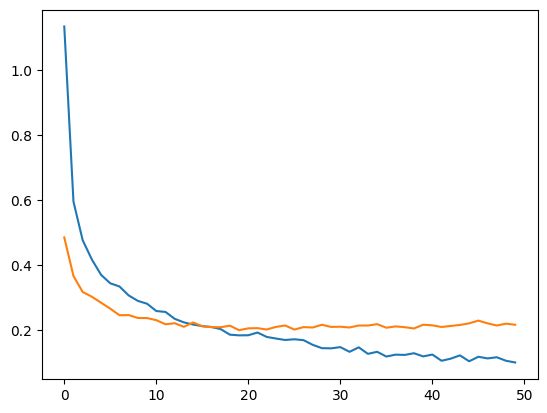

In [14]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()